Accuracy of Naive Bayes classifier = 99.75 %


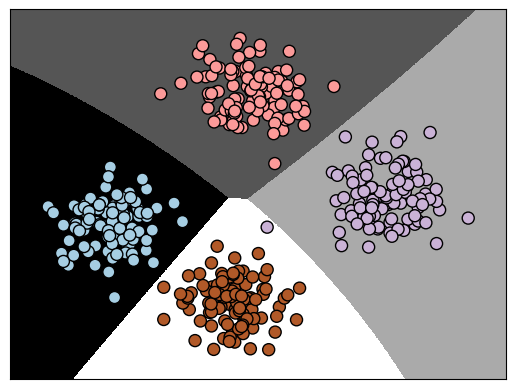

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from utilities import visualize_classifier

input_file = 'data_multivar_nb.txt'

# Завантаження даних із вхідного файлу
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Створення наївного байєсовського класифікатора
classifier = GaussianNB()

# Тренування класифікатора
classifier.fit(X, y)

# Прогнозування значень для тренувальних даних
y_pred = classifier.predict(X)

# Обчислення якості класифікатора
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")


# Візуалізація результатів роботи класифікатора
visualize_classifier(classifier, X, y)

Accuracy of the new classifier = 100.0 %


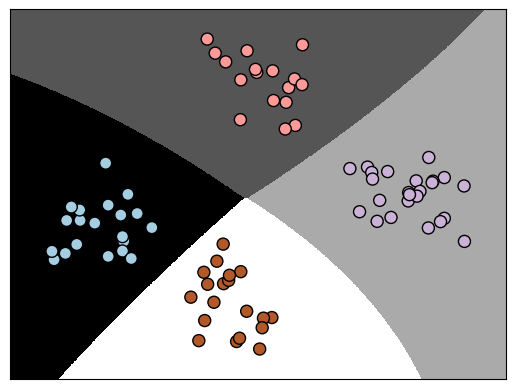


--- Cross-validation results ---
Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from utilities import visualize_classifier

# Дані з попереднього завдання
input_file = 'data_multivar_nb.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Розбивка даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

# Обчислення якості класифікатора
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

# Візуалізація роботи класифікатора
visualize_classifier(classifier_new, X_test, y_test)

print("\n--- Cross-validation results ---")
num_folds = 3
classifier = GaussianNB()

accuracy_values = cross_val_score(classifier, X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100 * accuracy_values.mean(), 2)) + "%")

precision_values = cross_val_score(classifier, X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100 * precision_values.mean(), 2)) + "%")

recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")

f1_values = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100 * f1_values.mean(), 2)) + "%")